<a href="https://colab.research.google.com/github/SandraMel/DigitalSan/blob/main/LogFileAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open the log file such that only a single line at a time is loaded into memory.

In [1]:
!wget https://web.cs.dal.ca/~kuzniar/a2_files/part2.log

--2024-03-30 23:12:50--  https://web.cs.dal.ca/~kuzniar/a2_files/part2.log
Resolving web.cs.dal.ca (web.cs.dal.ca)... 129.173.22.11
Connecting to web.cs.dal.ca (web.cs.dal.ca)|129.173.22.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76500 (75K) [text/plain]
Saving to: ‘part2.log’

part2.log           100%[===================>]  74.71K  --.-KB/s    in 0.06s   

2024-03-30 23:12:50 (1.21 MB/s) - ‘part2.log’ saved [76500/76500]



In [2]:
def read_log_file(filepath):
    with open(filepath, 'r') as file:
        for line in file:
            yield line.strip()

# Example usage:
log_file_path = 'part2.log'
for line in read_log_file(log_file_path):
    # Process each line here
    print(line)


2022-08-05 10:07:55.355	Cy1cVd4x3KZVEB2km2	192.168.253.154	49704	34.107.221.82	80	1	GET	detectportal.firefox.com	/canonical.html
2022-08-05 10:07:55.634	CT2TVs3rcSojYIobYi	192.168.253.154	49706	34.107.221.82	80	1	GET	detectportal.firefox.com	/success.txt?ipv4
2022-08-05 10:07:55.727	CEpVQS1XCpVcTC9BQc	192.168.253.154	49707	23.202.229.179	80	1	POST	r3.o.lencr.org	/
2022-08-05 10:07:55.974	CsocPy3r3rQzZgSHpj	192.168.253.154	49711	93.184.220.29	80	1	POST	ocsp.digicert.com	/
2022-08-05 10:07:55.979	CGlOLDVPi7YMAORDc	192.168.253.154	49713	93.184.220.29	80	1	POST	ocsp.digicert.com	/
2022-08-05 10:07:55.979	C5dFO23vPEG9FmJmvl	192.168.253.154	49712	93.184.220.29	80	1	POST	ocsp.digicert.com	/
2022-08-05 10:07:56.364	CsocPy3r3rQzZgSHpj	192.168.253.154	49711	93.184.220.29	80	2	POST	ocsp.digicert.com	/
2022-08-05 10:07:59.279	Ci5tf73Quz0D7H6xs	192.168.253.154	49729	142.250.184.227	80	1	POST	ocsp.pki.goog	/gts1c3
2022-08-05 10:07:59.280	C2lmOb18U9B6o8pqrd	192.168.253.154	49728	142.250.184.227	80	1	

In [8]:
import re

def parse_log_file(filepath):
    with open(filepath, 'r') as file:
        for line in file:
            pattern = r'\[(?P<ts>[^\]]+)\]\s+(?P<uid>\S+)\s+(?P<id_orig_h>\S+)\s+(?P<id_orig_p>\d+)\s+(?P<id_resp_h>\S+)\s+(?P<id_resp_p>\d+)\s+(?P<trans_depth>\d+)\s+"(?P<method>[A-Z]+)\s+(?P<host>[^"]*)\s+(?P<uri>[^"]*)"'

            match = re.match(pattern, line)

            if match:
                yield {
                    'ts': match.group('ts'),
                    'uid': match.group('uid'),
                    'id_orig_h': match.group('id_orig_h'),
                    'id_orig_p': int(match.group('id_orig_p')),
                    'id_resp_h': match.group('id_resp_h'),
                    'id_resp_p': int(match.group('id_resp_p')),
                    'trans_depth': int(match.group('trans_depth')),
                    'method': match.group('method'),
                    'host': match.group('host'),
                    'uri': match.group('uri')
                }

log_file_path = 'part2.log'
for entry in parse_log_file(log_file_path):
    print(entry)

In [9]:
from collections import Counter

def parse_log_file(filepath):
    hosts = []  # List to store all hosts
    with open(filepath, 'r') as file:
        for line in file:
            # Define regular expression pattern to match the fields
            pattern = r'\[(?P<ts>[^\]]+)\]\s+(?P<uid>\S+)\s+(?P<id_orig_h>\S+)\s+(?P<id_orig_p>\d+)\s+(?P<id_resp_h>\S+)\s+(?P<id_resp_p>\d+)\s+(?P<trans_depth>\d+)\s+"(?P<method>[A-Z]+)\s+(?P<host>[^"]*)\s+(?P<uri>[^"]*)"'

            # Match the pattern against the line
            match = re.match(pattern, line)

            # If a match is found, extract the host and add it to the list
            if match:
                host = match.group('host')
                hosts.append(host)

    # Count occurrences of each host
    host_counter = Counter(hosts)

    # Print the three most common hosts
    print("Top three most common hosts:")
    for host, count in host_counter.most_common(3):
        print(f"{host}: {count} occurrences")

# Example usage:
log_file_path = 'part2.log'
parse_log_file(log_file_path)


Top three most common hosts:


In [11]:
import matplotlib.pyplot as plt

Top hosts and their timestamps:
{}


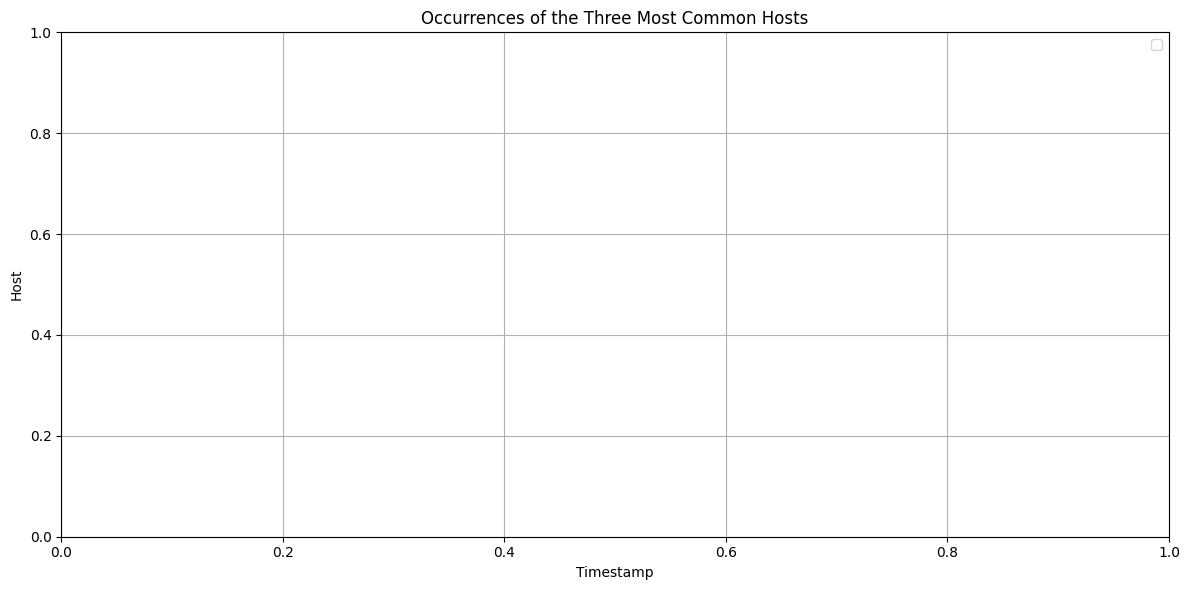

In [14]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime

def parse_log_file(filepath):
    hosts = []  # List to store all hosts
    timestamps = []  # List to store timestamps corresponding to each host
    with open(filepath, 'r') as file:
        for line in file:
            # Define regular expression pattern to match the fields
            pattern = r'\[(?P<ts>[^\]]+)\]\s+(?P<uid>\S+)\s+(?P<id_orig_h>\S+)\s+(?P<id_orig_p>\d+)\s+(?P<id_resp_h>\S+)\s+(?P<id_resp_p>\d+)\s+(?P<trans_depth>\d+)\s+"(?P<method>[A-Z]+)\s+(?P<host>[^"]*)\s+(?P<uri>[^"]*)"'

            # Match the pattern against the line
            match = re.match(pattern, line)

            # If a match is found, extract the host and timestamp
            if match:
                host = match.group('host')
                hosts.append(host)
                timestamp = match.group('ts')
                timestamps.append(datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f'))

    # Count occurrences of each host
    host_counter = Counter(hosts)

    # Get the three most common hosts
    top_hosts = [host for host, _ in host_counter.most_common(3)]

    # Create a dictionary to store timestamps for each top host
    top_hosts_timestamps = {host: [] for host in top_hosts}
    for host, timestamp in zip(hosts, timestamps):
        if host in top_hosts:
            top_hosts_timestamps[host].append(timestamp)

    return top_hosts_timestamps

# Example usage:
log_file_path = 'part2.log'
top_hosts_timestamps = parse_log_file(log_file_path)

# Print the obtained dictionary
print("Top hosts and their timestamps:")
print(top_hosts_timestamps)

# Plotting
plt.figure(figsize=(12, 6))
for host, timestamps in top_hosts_timestamps.items():
    plt.plot(timestamps, [host] * len(timestamps), 'o', label=host)

plt.xlabel('Timestamp')
plt.ylabel('Host')
plt.title('Occurrences of the Three Most Common Hosts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
